In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller

In [ ]:
#df = pd.read_csv('/content/sample_data/sp500_stocks.csv')
df = pd.read_csv('/content/sample_data/output (1).csv')
df

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,AEP,20.083557,34.939999,36.000000,34.799999,35.099998,4076600.0
1,2010-01-05,AEP,19.853634,34.540001,35.119999,34.360001,34.980000,5112400.0
2,2010-01-06,AEP,20.054811,34.889999,35.099998,34.459999,34.560001,3157400.0
3,2010-01-07,AEP,20.227253,35.189999,35.310001,34.689999,34.779999,3581200.0
4,2010-01-08,AEP,20.468672,35.610001,35.810001,34.930000,35.180000,3980600.0
...,...,...,...,...,...,...,...,...
3605,2024-05-01,AEP,88.150002,88.150002,89.360001,85.699997,85.760002,5344700.0
3606,2024-05-02,AEP,88.250000,88.250000,88.639999,87.400002,88.050003,2672800.0
3607,2024-05-03,AEP,88.599998,88.599998,89.279999,87.949997,89.000000,3332400.0
3608,2024-05-06,AEP,88.809998,88.809998,89.190002,88.199997,88.760002,2354100.0


In [ ]:
df.isnull().sum()

Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [ ]:
df = df.interpolate(method='linear', axis=0)
df

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,AEP,20.083557,34.939999,36.000000,34.799999,35.099998,4076600.0
1,2010-01-05,AEP,19.853634,34.540001,35.119999,34.360001,34.980000,5112400.0
2,2010-01-06,AEP,20.054811,34.889999,35.099998,34.459999,34.560001,3157400.0
3,2010-01-07,AEP,20.227253,35.189999,35.310001,34.689999,34.779999,3581200.0
4,2010-01-08,AEP,20.468672,35.610001,35.810001,34.930000,35.180000,3980600.0
...,...,...,...,...,...,...,...,...
3605,2024-05-01,AEP,88.150002,88.150002,89.360001,85.699997,85.760002,5344700.0
3606,2024-05-02,AEP,88.250000,88.250000,88.639999,87.400002,88.050003,2672800.0
3607,2024-05-03,AEP,88.599998,88.599998,89.279999,87.949997,89.000000,3332400.0
3608,2024-05-06,AEP,88.809998,88.809998,89.190002,88.199997,88.760002,2354100.0


In [ ]:
#df.isnull().sum()

In [ ]:
### normalizing the data as certain neural networks are sensitive to scale of the features

numeric_columns = df.select_dtypes(include=['float64']).columns
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df[numeric_columns])
normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns)
non_numeric_columns = df.select_dtypes(exclude=['float64']).columns
normalized_df[non_numeric_columns] = df[non_numeric_columns]


In [ ]:
# prompt: after normalizing numeric data join Date and symbol columns back

#normalized_df

In [ ]:
#date column to date time
normalized_df['Date'] = pd.to_datetime(normalized_df['Date'])


In [ ]:
#  encode symbol column

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

normalized_df['Symbol'] = le.fit_transform(normalized_df['Symbol'])

normalized_df


,Adj Close,Close,High,Low,Open,Volume,Date,Symbol
0,0.022700,0.053497,0.067399,0.085962,0.060736,0.165178,2010-01-04,0
1,0.019852,0.048107,0.055608,0.080179,0.059124,0.212227,2010-01-05,0
2,0.022344,0.052823,0.055340,0.081493,0.053480,0.123426,2010-01-06,0
3,0.024479,0.056866,0.058154,0.084516,0.056436,0.142676,2010-01-07,0
4,0.027470,0.062525,0.064853,0.087671,0.061811,0.160818,2010-01-08,0
...,...,...,...,...,...,...,...,...
3605,0.865800,0.770516,0.782393,0.754995,0.741467,0.222778,2024-05-01,0
3606,0.867038,0.771864,0.772746,0.777340,0.772239,0.101414,2024-05-02,0
3607,0.871373,0.776580,0.781321,0.784569,0.785004,0.131375,2024-05-03,0
3608,0.873975,0.779410,0.780115,0.787855,0.781779,0.086938,2024-05-06,0


In [ ]:
# Save the DataFrame to a CSV file
normalized_df.to_csv('normalized_data.csv', index=False)


In [ ]:
# prompt: check is Adj close column is stationary

adf_result = adfuller(normalized_df['Adj Close'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])


ADF Statistic: -0.8149600324181472
p-value: 0.8146881260990242


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller


transformed_data = {}
df_subset = normalized_df
transformed_data = {}
# Perform Dickey-Fuller test for each column
for column in ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']:
    result = adfuller(df_subset[column])

    # Check if the time series is stationary
    if result[1] > 0.05:
        #print("Time series is non-stationary for column:", column)
        #print("Applying differencing and logarithmic transformation...")

        # Differencing
        df_diff = df_subset[column].diff().dropna()

        # Fill NaN values with 0.0
        df_diff.fillna(0.0, inplace=True)

        # Check if differencing results in zero values
        if any(df_diff == 0):
          #  print("Differencing resulted in zero values. Adjusting...")
            df_diff += 1e-10  # Add a small value to avoid zero

        # Logarithmic Transformation
        df_log = np.log(df_diff)

        # Fill NaN values with 0.0
        df_log.fillna(0.0, inplace=True)

        # Check if logarithmic transformation resulted in infinite values
        if np.any(np.isinf(df_log)):
            print("Logarithmic transformation resulted in infinite values.")
            print("Skipping Dickey-Fuller test for this column.")
        else:
            transformed_data[column] = df_log

    else:
        #print("Time series is stationary for column:", column)
        #print("No further transformation needed for column:", column)
        transformed_data[column] = df_subset[column]

# Create DataFrame with transformed data
transformed_df = pd.DataFrame(transformed_data)

# Display the DataFrame
#print(transformed_df.head())


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
transformed_df

,Adj Close,Close,High,Low,Open,Volume
0,NaN,NaN,NaN,NaN,NaN,0.165178
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.212227
2,-5.994721,-5.356725,0.000000,-6.634386,0.000000,0.123426
3,-6.148851,-5.510874,-5.873176,-5.801463,-5.823864,0.142676
4,-5.812376,-5.174395,-5.005690,-5.758895,-5.226012,0.160818
...,...,...,...,...,...,...
3605,-3.639737,-3.555482,-4.254276,0.000000,0.000000,0.222778
3606,-6.693754,-6.609499,0.000000,-3.801154,-3.481173,0.101414
3607,-5.440981,-5.356725,-4.758831,-4.929631,-4.361021,0.131375
3608,-5.951806,-5.867551,0.000000,-5.718080,0.000000,0.086938


In [ ]:
transformed_df = transformed_df.fillna(0.0)
transformed_df


,Adj Close,Close,High,Low,Open,Volume
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.165178
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.212227
2,-5.994721,-5.356725,0.000000,-6.634386,0.000000,0.123426
3,-6.148851,-5.510874,-5.873176,-5.801463,-5.823864,0.142676
4,-5.812376,-5.174395,-5.005690,-5.758895,-5.226012,0.160818
...,...,...,...,...,...,...
3605,-3.639737,-3.555482,-4.254276,0.000000,0.000000,0.222778
3606,-6.693754,-6.609499,0.000000,-3.801154,-3.481173,0.101414
3607,-5.440981,-5.356725,-4.758831,-4.929631,-4.361021,0.131375
3608,-5.951806,-5.867551,0.000000,-5.718080,0.000000,0.086938


In [ ]:
#  save transformed_df into csv
transformed_df.to_csv('/content/sample_data/transformed_data.csv')


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.2 MB/s eta 0:00:00


**ARIMA MODEL**

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=-18667.508, Time=24.07 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=-14477.222, Time=0.51 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=-18214.440, Time=6.58 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=-16391.576, Time=10.04 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=-14419.950, Time=0.27 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=-17616.849, Time=1.16 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=14.14 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=-18669.397, Time=40.29 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=inf, Time=33.37 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=-16389.586, Time=23.03 sec
 ARIMA(1,0,0)(0,1,2)[7] intercept   : AIC=-18788.451, Time=21.88 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=-18586.918, Time=5.12 sec
 ARIMA(1,0,0)(1,1,2)[7] intercept   : AIC=-18657.316, Time=20.59 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=20.20 sec
 ARIMA(0,0,0)(0,1

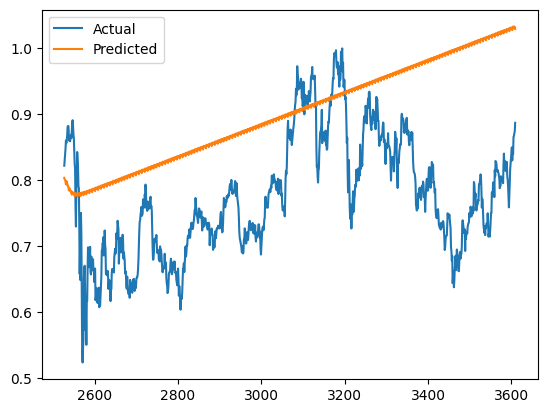

Mean Squared Error (MSE): 0.02414713497506184
Mean Absolute Error (MAE): 0.13572804650268602
Root Mean Squared Error (RMSE): 0.1553934843391506


In [ ]:
# Import necessary libraries
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pmdarima import auto_arima

# Split the data into training and testing sets
train, test = train_test_split(normalized_df, train_size=0.7)

# Fit the ARIMA model
stepwise_model = auto_arima(train['Adj Close'], start_p=1, start_q=1,
                            test='adf',
                            max_p=2, max_q=2, m=7,
                            start_P=0, seasonal=True,
                            d=None, D=1, trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

# Make predictions on the test set
predictions = stepwise_model.predict(n_periods=len(test))

# Plot the actual and predicted values
plt.plot(test['Adj Close'], label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

# Compute MSE
mse = mean_squared_error(test['Adj Close'], predictions)

# Calculate MAE
mae = mean_absolute_error(test['Adj Close'], predictions)

# Calculate RMSE
rmse = mean_squared_error(test['Adj Close'], predictions, squared=False)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

with open('/content/arima_model.pkl', 'wb') as pkl_file:
    pickle.dump(stepwise_model, pkl_file)


In [ ]:
with open('arima_model.pkl', 'rb') as pkl_file:
    loaded_model = pickle.load(pkl_file)


In [ ]:
# Import necessary libraries
# from statsmodels.tsa.arima.model import ARIMA
# from pmdarima.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.pyplot as plt
# import pickle

# transformed_df = pd.read_csv('/content/sample_data/transformed_data.csv')
# # Split the data into training and testing sets
# train, test = train_test_split(transformed_df, train_size=0.7)

# # Define the range of values for p, d, and q
# p_values = range(3)  # Example: range(3) for p = 0, 1, 2
# d_values = range(3)  # Example: range(3) for d = 0, 1, 2
# q_values = range(3)  # Example: range(3) for q = 0, 1, 2

# best_mse = float('inf')
# best_r_squared = -float('inf')
# best_params = None
# best_model = None

# # Loop over different values of p, d, and q
# for p in p_values:
#     for d in d_values:
#         for q in q_values:
#             try:
#                 # Define the ARIMA model
#                 model = ARIMA(train['Adj Close'], order=(p, d, q))

#                 # Fit the model
#                 results = model.fit()

#                 # Make predictions on the test set
#                 predictions = results.predict(start=len(train), end=len(train) + len(test) - 1)

#                 # Compute MSE and R-squared
#                 mse = mean_squared_error(test['Adj Close'], predictions)
#                 r_squared = r2_score(test['Adj Close'], predictions)

#                 # Update best parameters and model if the current model has lower MSE or higher R-squared
#                 if mse < best_mse and r_squared > best_r_squared:
#                     best_mse = mse
#                     best_r_squared = r_squared
#                     best_params = (p, d, q)
#                     best_model = results  # Save the best model

#             except:
#                 continue

# # Print the best parameters and corresponding MSE and R-squared
# print("Best parameters (p, d, q):", best_params)
# print("Best Mean Squared Error (MSE):", best_mse)
# print("Best R-squared:", best_r_squared)

# # Pickle the best model
# with open('best_arima_model.pkl', 'wb') as f:
#     pickle.dump(best_model, f)


In [ ]:
!pip install tensorflow


**ANN MODEL**

--> ANN model constitutes of three layers, viz., input, hidden, and output.

Epoch 1/10
111/111 [==============================] - 15s 80ms/step - loss: 0.0163
Epoch 2/10
111/111 [==============================] - 9s 84ms/step - loss: 0.0035
Epoch 3/10
111/111 [==============================] - 9s 85ms/step - loss: 0.0033
Epoch 4/10
111/111 [==============================] - 10s 86ms/step - loss: 0.0029
Epoch 5/10
111/111 [==============================] - 10s 93ms/step - loss: 0.0028
Epoch 6/10
111/111 [==============================] - 9s 79ms/step - loss: 0.0028
Epoch 7/10
111/111 [==============================] - 9s 85ms/step - loss: 0.0025
Epoch 8/10
111/111 [==============================] - 10s 89ms/step - loss: 0.0024
Epoch 9/10
111/111 [==============================] - 10s 90ms/step - loss: 0.0026
Epoch 10/10
111/111 [==============================] - 4s 24ms/step


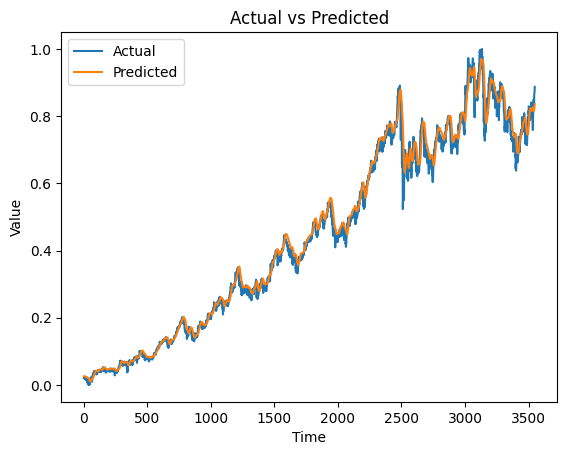

Mean Squared Error (MSE): 0.0007456845434981881
Mean Absolute Error (MAE): 0.017812002445750052
Root Mean Squared Error (RMSE): 0.027307225115309468


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

# Assuming you have prepared train, validation, and test datasets and their corresponding target values
# Replace placeholders with your actual data
#transformed_df = pd.read_csv('/content/sample_data/transformed_data.csv')
# Split the data into training and testing sets
train = np.array(normalized_df['Adj Close'])
test = np.array(normalized_df['Adj Close'])

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.reshape(-1, 1))
test_scaled = scaler.transform(test.reshape(-1, 1))

# Create sequences for training and testing
X_train, y_train = [], []
for i in range(60, len(train_scaled)):
    X_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
for i in range(len(test_scaled) - 60):
    X_test.append(test_scaled[i:i+60, 0])
X_test = np.array(X_test)

# Reshape data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
test = scaler.inverse_transform(test_scaled[60:])  # Adjust for the window size used in X_test

# Plot the actual and predicted values
plt.plot(test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(test, predictions)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(test, predictions)

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Save the trained model to a file
with open('ann_model_1.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the model
model.save("ann_model_2.h5")


Mean Squared Error (MSE): 0.0014525399242819683
Mean Absolute Error (MAE): 0.029112451122727864
Root Mean Squared Error (RMSE): 0.03811220177688464


In [ ]:
with open('ann_model_1.pkl', 'rb') as pkl_file:
    loaded_model = pickle.load(pkl_file)

**SARIMA (Seasonal ARIMA)**

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Best parameters (p, d, q): (0, 1, 0)
Best AIC: -19044.698150399065


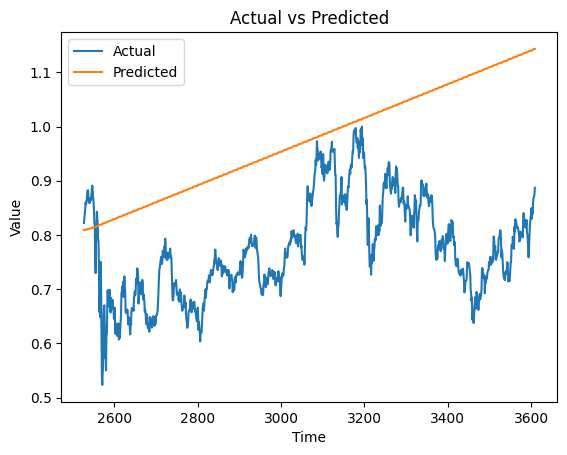

Mean Squared Error (MSE): 0.05048528329121752
Mean Absolute Error (MAE): 0.20319375386838867
Root Mean Squared Error (RMSE): 0.22468930390923714


In [ ]:

# Import necessary libraries

from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Split the data into training and testing sets
train, test = train_test_split(normalized_df, train_size=0.7)

# Define the seasonal order
seasonal_order = (2, 1, 1, 12)


# Initialize lists to store the best parameters and metrics
best_aic = float('inf')
best_params = None
best_model = None

# Loop over different values of p, d, q
for p in range(3):
    for d in range(3):
        for q in range(3):
            try:
                # Define the SARIMA model
                model = SARIMAX(train['Adj Close'], order=(p, d, q), seasonal_order=seasonal_order)

                # Fit the model
                results = model.fit(disp=False)

                # Check if the current model has a lower AIC than the previous best model
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_params = (p, d, q)
                    best_model = results

            except:
                continue

# Print the best parameters and corresponding AIC
print("Best parameters (p, d, q):", best_params)
print("Best AIC:", best_aic)

# Pickle the best model
with open('sarima_model_1.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Make predictions on the test set
predictions = best_model.predict(start=len(train), end=len(train) + len(test) - 1)

# Compute MSE and R-squared
mse = mean_squared_error(test['Adj Close'], predictions)

# Calculate MAE
mae = mean_absolute_error(test['Adj Close'], predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Adj Close'], predictions))

# Print the results

plt.plot(test['Adj Close'], label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


# Print MSE and R-squared
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)



In [ ]:
with open('sarima_model_1.pkl', 'rb') as pkl_file:
    loaded_model = pickle.load(pkl_file)

**Hybrid Models Integration**

Epoch 1/100
2523/2523 - 8s - loss: 0.0021 - 8s/epoch - 3ms/step
Epoch 2/100
2523/2523 - 6s - loss: 7.2675e-05 - 6s/epoch - 2ms/step
Epoch 3/100
2523/2523 - 6s - loss: 8.4159e-05 - 6s/epoch - 2ms/step
Epoch 4/100
2523/2523 - 6s - loss: 7.4699e-05 - 6s/epoch - 2ms/step
Epoch 5/100
2523/2523 - 5s - loss: 7.7345e-05 - 5s/epoch - 2ms/step
Epoch 6/100
2523/2523 - 7s - loss: 7.4399e-05 - 7s/epoch - 3ms/step
Epoch 7/100
2523/2523 - 7s - loss: 6.4780e-05 - 7s/epoch - 3ms/step
Epoch 8/100
2523/2523 - 7s - loss: 6.6577e-05 - 7s/epoch - 3ms/step
Epoch 9/100
2523/2523 - 5s - loss: 6.5303e-05 - 5s/epoch - 2ms/step
Epoch 10/100
2523/2523 - 7s - loss: 6.0307e-05 - 7s/epoch - 3ms/step
Epoch 11/100
2523/2523 - 6s - loss: 6.3983e-05 - 6s/epoch - 2ms/step
Epoch 12/100
2523/2523 - 7s - loss: 6.0538e-05 - 7s/epoch - 3ms/step
Epoch 13/100
2523/2523 - 6s - loss: 6.2692e-05 - 6s/epoch - 2ms/step
Epoch 14/100
2523/2523 - 6s - loss: 6.1391e-05 - 6s/epoch - 2ms/step
Epoch 15/100
2523/2523 - 6s - loss: 6.1800e-05 

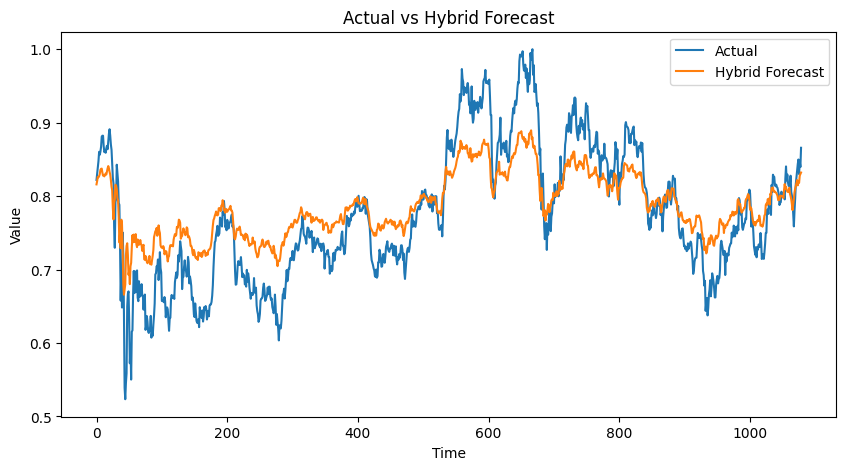

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import pickle

# Function to create dataset with time lag
def create_dataset(dataset, lag=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-lag-1):
        a = dataset[i:(i+lag), 0]
        dataX.append(a)
        dataY.append(dataset[i + lag, 0])
    return np.array(dataX), np.array(dataY)


# Assuming the timestamp is in the first column
time_series = normalized_df.iloc[:, 0].values

# Convert timestamps to numerical values
time_series_numeric = pd.to_numeric(time_series)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(time_series_numeric.reshape(-1, 1))

# Split data into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Prepare the data for ARIMA
train_arima = [x[0] for x in train]
test_arima = [x[0] for x in test]

# Fit ARIMA model
arima_order = (5,1,0)  # Example ARIMA parameters (p,d,q)
arima_model = ARIMA(train_arima, order=arima_order)
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.forecast(steps=len(test_arima))[0]

# Prepare the data for ANN
look_back = 3  # Number of previous time steps to use as input features
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Build and train ANN model
ann_model = Sequential()
ann_model.add(LSTM(units=50, input_shape=(1, look_back)))
ann_model.add(Dense(units=1))
ann_model.compile(optimizer='adam', loss='mean_squared_error')
ann_model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Predict using ANN model
ann_forecast = ann_model.predict(testX)
ann_forecast = scaler.inverse_transform(ann_forecast)

# Combine forecasts from ARIMA and ANN using simple averaging
hybrid_forecast = (arima_forecast + ann_forecast.flatten()) / 2.0

# Calculate RMSE, MAE for comparison
# Align the lengths of test_arima and ann_forecast
if len(test_arima) > len(ann_forecast):
    test_arima = test_arima[:len(ann_forecast)]
elif len(test_arima) < len(ann_forecast):
    ann_forecast = ann_forecast[:len(test_arima)]

rmse_arima = np.sqrt(np.mean((test_arima - arima_forecast)**2))
rmse_ann = np.sqrt(np.mean((test_arima - ann_forecast.flatten())**2))
rmse_hybrid = np.sqrt(np.mean((test_arima - hybrid_forecast)**2))
mae_arima = np.mean(np.abs(test_arima - arima_forecast))
mae_ann = np.mean(np.abs(test_arima - ann_forecast.flatten()))
mae_hybrid = np.mean(np.abs(test_arima - hybrid_forecast))

print("RMSE ARIMA:", rmse_arima)
print("RMSE ANN:", rmse_ann)
print("RMSE Hybrid:", rmse_hybrid)
print("MAE ARIMA:", mae_arima)
print("MAE ANN:", mae_ann)
print("MAE Hybrid:", mae_hybrid)

# Plot predicted vs actual values
plt.figure(figsize=(10, 5))
plt.plot(test_arima, label='Actual')
plt.plot(hybrid_forecast, label='Hybrid Forecast')
plt.title('Actual vs Hybrid Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Save the hybrid model
with open('hybrid_model_1.pkl', 'wb') as pkl_file:
    pickle.dump((arima_model_fit, ann_model), pkl_file)


In [ ]:
# Load the hybrid model
with open('hybrid_model_1.pkl', 'rb') as pkl_file:
    arima_model_fit, ann_model = pickle.load(pkl_file)


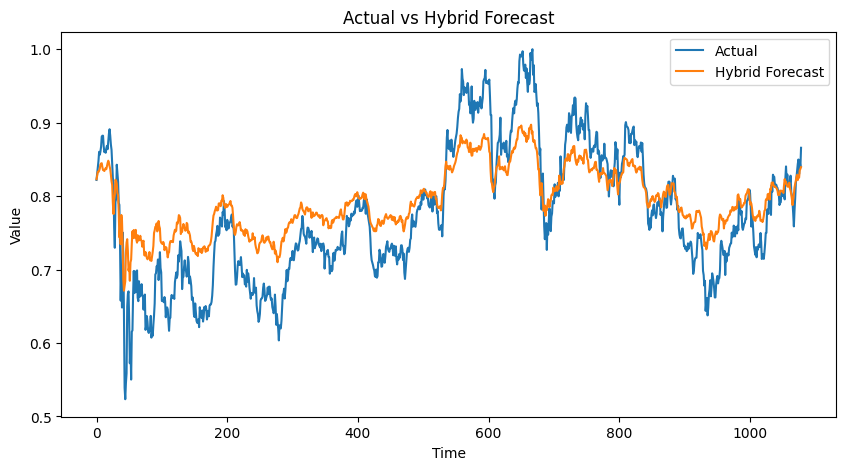

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Step 1: Load data from the pickle file
with open('/content/hybrid_model.pkl', 'rb') as f:
    data = pickle.load(f)

# Assuming actual_values contains the actual values directly
actual_values = actual_values

# Assuming predicted_values is an array of predictions
predicted_values = predicted_values
# Plot predicted vs actual values
plt.figure(figsize=(10, 5))
plt.plot(test_arima, label='Actual')
plt.plot(hybrid_forecast, label='Hybrid Forecast')
plt.title('Actual vs Hybrid Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()



111/111 [==============================] - 3s 19ms/step


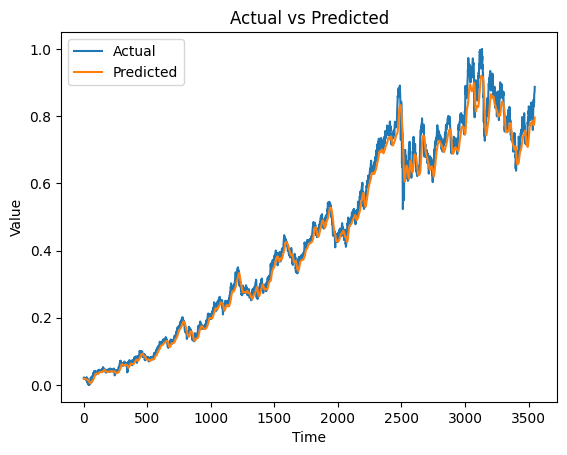

In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the trained model from the pickle file
with open('/content/ann_model_1.pkl', 'rb') as pkl_file:
    model = pickle.load(pkl_file)

# Assuming you have prepared train, validation, and test datasets and their corresponding target values
# Replace placeholders with your actual data
# transformed_df = pd.read_csv('/content/sample_data/transformed_data.csv')
# Split the data into training and testing sets
train = np.array(normalized_df['Adj Close'])
test = np.array(normalized_df['Adj Close'])

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.reshape(-1, 1))
test_scaled = scaler.transform(test.reshape(-1, 1))

# Create sequences for testing
X_test = []
for i in range(len(test_scaled) - 60):
    X_test.append(test_scaled[i:i+60, 0])
X_test = np.array(X_test)

# Reshape data for LSTM
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
test = scaler.inverse_transform(test_scaled[60:])  # Adjust for the window size used in X_test

# Plot the actual and predicted values
plt.plot(test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()